In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Documentation

In [1]:
from IPython.display import IFrame
Folium = IFrame(src='https://amueller.github.io/word_cloud/references.html', width=1000, height=500)
display(Folium)

# Dataset
* Dataset/Done/reviews.csv

# Create Word Cloud

### Get Data

In [2]:
file = "Dataset/Done/reviews.csv"
reviews = pd.read_csv(file)
reviews.head()

,business_id,review_id,user_id,stars,useful,funny,cool,text,date
0,6iYb2HFDywm3zjuRg0shjw,bkHUOCicGZ856vpvcWuW7Q,93z0yh-sUpGZS-cSKu6xxA,5,1,0,0,Stopped in on a busy Friday night. Despite the...,2018-03-04 00:59:21
1,6iYb2HFDywm3zjuRg0shjw,VKBc48PPwyWIUE1RhBT_8A,Q_CZIvnsDHjpls-EPzzG7Q,2,0,0,0,Went there about 1 PM on a Monday. It wasn't ...,2018-08-14 05:22:00
2,6iYb2HFDywm3zjuRg0shjw,JKNv1l7JgayZjG6nK__hXQ,rqxTSFFj5fZNmabY1fmTlw,5,0,0,0,This was the place the be on Friday Night! If ...,2018-03-17 14:22:48
3,6iYb2HFDywm3zjuRg0shjw,WNM_Oyzy6mB6n0Z9lcuZyQ,vNPxlt5f50q0e2nVAScW3Q,4,0,0,0,Went to this place with my family over the wee...,2018-04-04 21:16:50
4,6iYb2HFDywm3zjuRg0shjw,jG4gZz5FrHyItJXz1YV9Sw,eXRC79iX60xwA1UuGRuWNg,4,0,0,0,"Stopped on a midweek afternoon, and so glad th...",2018-04-28 19:17:04


#### 找出評論數最多的餐廳

In [3]:
print(f"總共有 {reviews['business_id'].nunique()} 間餐廳")
reviews['business_id'].value_counts()

總共有 50763 間餐廳


4CxF8c3MB7VAdY8zFb2cZQ    9295
OQ2oHkcWA8KNC1Lsvj1SBA    7394
PrsvO1rzkgg6qFizlAoEtg    7385
zioLxtBc9THNS2TOn9xW1w    6325
y2w6rFaO0XEiG5mFfOsiFA    5220
                          ... 
VpHUuPrYmvLSFea3JAjrLQ       5
ui5yjG8R3sMkZujjDHogrg       5
oWomK2cX2LzYIgc5LkoWaA       5
b39mDjj6wNGjEKWltg9txw       5
DqKzsjAALp8C95ZhoGfUqQ       5
Name: business_id, Length: 50763, dtype: int64

#### 取出4星以上的評論

In [4]:
business_id = '4CxF8c3MB7VAdY8zFb2cZQ'
good_review = " ".join(review for review in reviews[(reviews['business_id'] == business_id) & (reviews['stars'] >= 4)]['text'])
print(f"good_review: {str(len(good_review))} chars")
reviews[(reviews['business_id'] == business_id) & (reviews['stars'] >= 4)].head()

good_review: 2627313 chars


,business_id,review_id,user_id,stars,useful,funny,cool,text,date
1226116,4CxF8c3MB7VAdY8zFb2cZQ,19msT9vUbN1xI17FTsFBOw,s-xMG4eoG1YO0N795PaAiQ,4,0,0,0,"It's a must when visitors come to town, not th...",2015-10-07 21:39:23
1226117,4CxF8c3MB7VAdY8zFb2cZQ,GAzyhQ6FquMy-W_IM55NcA,9tW7SD-mL6PlHIOvORVMig,4,0,0,0,The maple bacon bar is to die for. I live in P...,2012-07-16 02:07:27
1226119,4CxF8c3MB7VAdY8zFb2cZQ,5DYJBTm9V9w0xcrXVcqmRg,8ZoyTgGq0wUHDNISHU7D0Q,4,0,0,0,"Love! Bacon-Maple Bars are my favorite, but s...",2014-10-11 06:52:26
1226120,4CxF8c3MB7VAdY8zFb2cZQ,de2fVUfTiLuWuRcfNrrHTg,7PHHxsjyk7I7oM6ENxwZZQ,5,2,2,1,"I'd been hearing about this place for forever,...",2018-03-23 14:17:26
1226122,4CxF8c3MB7VAdY8zFb2cZQ,c8m7iiUTpZ9g2Hs_plJlUQ,c0Wg7FzhocvNf2zUE9KZVw,5,0,1,0,Had to act like a tourist and stop by voodoo t...,2018-10-04 11:17:16


#### 取出2星以上的評論

In [5]:
bad_review = " ".join(review for review in reviews[(reviews['business_id'] == business_id) & (reviews['stars'] <= 2)]['text'])
print(f"bad_review: {str(len(good_review))} chars")
reviews[(reviews['business_id'] == business_id) & (reviews['stars'] <= 2)].head()

bad_review: 2627313 chars


,business_id,review_id,user_id,stars,useful,funny,cool,text,date
1226115,4CxF8c3MB7VAdY8zFb2cZQ,X4-EMXS7-XJZ9tuVJhn0-g,lzQLHoJdaMNwiNt76wrc4g,2,5,2,3,I am alway leery of places the trade on schtic...,2011-08-24 21:59:48
1226124,4CxF8c3MB7VAdY8zFb2cZQ,c6ErpHoRzV8hsCqUuCQwTA,_rYQR4MSphfN3tIfpx4awA,2,3,3,2,"one word: HYPE.\n\nLong line, which was to be ...",2013-03-18 18:16:46
1226127,4CxF8c3MB7VAdY8zFb2cZQ,iKHNCq1TbVbalqgmCgbemw,AR2V1Nl03AI8b4QaEmrSMQ,2,0,0,0,Ok. Yes.... yes. Eating donuts that look like ...,2014-01-17 02:35:15
1226130,4CxF8c3MB7VAdY8zFb2cZQ,JcMwUGuw3v07noRVagkOSQ,EZYKWCv66RH9qJ4O3V5xGw,1,0,0,0,"Okay donuts. They claim their ""vegan"" donuts a...",2018-04-04 00:57:09
1226138,4CxF8c3MB7VAdY8zFb2cZQ,dM_WP6-6riDq49ptT548-Q,vMuZsD1H9qf1DFVgw0Dy7g,2,0,0,0,"Just decorated ""weird"" or ""fun"" but the actual...",2015-03-18 18:08:24


### 把背景圖片轉成白色

In [6]:
good_mask = np.array(Image.open("Images/thumb_up.png"))
bad_mask = np.array(Image.open("Images/thumb_down.png"))
display(good_mask)
display(bad_mask)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
transformed_good_mask = np.ndarray((good_mask.shape[0], good_mask.shape[1]), np.int32)
for i in range(len(good_mask)):
    transformed_good_mask[i] = list(map(transform_format, good_mask[i]))
    
transformed_bad_mask = np.ndarray((bad_mask.shape[0], bad_mask.shape[1]), np.int32)    
for i in range(len(bad_mask)):
    transformed_bad_mask[i] = list(map(transform_format, bad_mask[i]))
    
display(transformed_good_mask)
display(transformed_bad_mask)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

### 製成Word Cloud

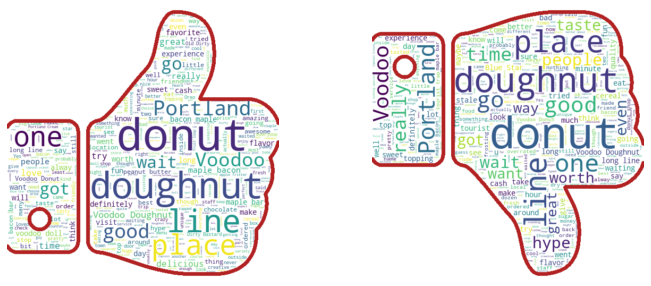

In [8]:
good_wordcloud = WordCloud(max_words=1000, background_color="white", mask=transformed_good_mask, contour_width=10, contour_color='firebrick').generate(good_review)
bad_wordcloud = WordCloud(max_words=1000, background_color="white", mask=transformed_bad_mask, contour_width=10, contour_color='firebrick').generate(bad_review)

fig = plt.figure(figsize=[12,5])
subplot1 = fig.add_subplot(1, 2, 1)        
subplot2 = fig.add_subplot(1, 2, 2)

subplot1.axis("off")
subplot2.axis("off")

subplot1.imshow(good_wordcloud, interpolation='bilinear')
subplot2.imshow(bad_wordcloud, interpolation='bilinear')

#### 以下為另一間餐廳Word Cloud製作

In [9]:
business_id = 'OQ2oHkcWA8KNC1Lsvj1SBA'
good_review = " ".join(review for review in reviews[(reviews['business_id'] == business_id) & (reviews['stars'] >= 4)]['text'])
bad_review = " ".join(review for review in reviews[(reviews['business_id'] == business_id) & (reviews['stars'] <= 2)]['text'])
print(f"good_review: {str(len(good_review))} chars")
print(f"bad_review:  {str(len(bad_review))}  chars")

good_review: 3565867 chars
bad_review:  234734  chars


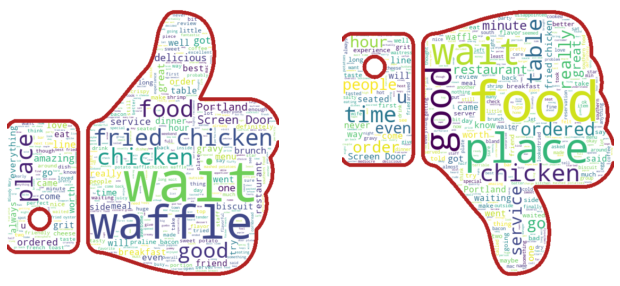

In [10]:
good_wordcloud = WordCloud(max_words=500, background_color="white", mask=transformed_good_mask, contour_width=10, contour_color='firebrick').generate(good_review)
bad_wordcloud = WordCloud(max_words=500, background_color="white", mask=transformed_bad_mask, contour_width=10, contour_color='firebrick').generate(bad_review)

fig = plt.figure(figsize=[11,5])
subplot1 = fig.add_subplot(1, 2, 1)        
subplot2 = fig.add_subplot(1, 2, 2)

subplot1.axis("off")
subplot2.axis("off")

subplot1.imshow(good_wordcloud, interpolation='bilinear')
subplot2.imshow(bad_wordcloud, interpolation='bilinear')